Using backend: pytorch


['_N']
{'node_type': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]), '_TYPE': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]), '_ID': tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9])}
['_E']
{'edge_type': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 

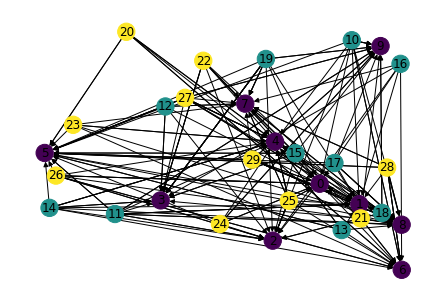

In [1]:
import networkx as nx
import dgl
import torch

# create an example heterograph

hg = dgl.heterograph({
    ('user', 'plays', 'game'): (torch.randint(0, 10, (100, 1)).reshape(-1), torch.randint(0, 10, (100, 1)).reshape(-1)),
    ('store', 'sells', 'game'): (torch.randint(0, 10, (100, 1)).reshape(-1), torch.randint(0, 10, (100, 1)).reshape(-1))
})

#Add the nodetype to the node data, so we can compare with dgl.to_homogeneous().to_networkx() is doing
nodetype_dict = dict()
for i, nodetype in enumerate(hg.ntypes):
    nodetype_dict[nodetype] = i
    hg.nodes[nodetype].data['node_type'] = torch.zeros(hg.num_nodes(nodetype)) + i

#Add the edgetype to the edge data, so we can compare with dgl.to_homogeneous().to_networkx() is doing
edgetype_dict = dict()
for i, edgetype in enumerate(hg.etypes):
    edgetype_dict[edgetype] = i
    hg.edges[edgetype].data['edge_type'] = torch.zeros(hg.num_edges(edgetype)) + i
    
#to homogeneous
homo_g = dgl.to_homogeneous(hg, ndata=['node_type'], edata=['edge_type'])

print(homo_g.ntypes)
print(homo_g.nodes['_N'].data)
#out: {'node_type': tensor([0., 0., 0., 1., 1., 2., 2., 2.]), '_TYPE': tensor([0, 0, 0, 1, 1, 2, 2, 2]), '_ID': tensor([0, 1, 2, 0, 1, 0, 1, 2])}

print(homo_g.etypes)
print(homo_g.edges['_E'].data)
#out: {'edge_type': tensor([0., 0., 0., 0., 1., 1., 1.]), '_TYPE': tensor([0, 0, 0, 0, 1, 1, 1]), '_ID': tensor([0, 1, 2, 3, 0, 1, 2])}

##We can see that the attr node_type we created is exactly the same as the automatically generated '_TYPE'

#to networkx
g_nx = homo_g.to_networkx(node_attrs=['_TYPE'], edge_attrs=['_TYPE'])

#get the list of nodes/edges and their attr
node_attr_dict = nx.get_node_attributes(g_nx, '_TYPE')
node_list = torch.tensor(list(node_attr_dict.keys()))
node_color = torch.tensor(list(node_attr_dict.values()))

edge_attr_dict = nx.get_edge_attributes(g_nx, '_TYPE')
edge_list = torch.tensor(list(node_attr_dict.keys()))
edge_color = torch.tensor(list(node_attr_dict.values()))

#plot

# pos = nx.planar_layout(g_nx)
pos = nx.random_layout(g_nx)

nx.draw(g_nx, 
        pos,
        node_color = node_color,
        with_labels=True,
       )

#next steps

#use DGL neighbour sampling to get k-hops nearest nodes around an edge pair
#https://docs.dgl.ai/en/latest/api/python/dgl.dataloading.html
#https://docs.dgl.ai/api/python/dgl.sampling.html

#Refine the labels (plot names instead of numbers?)

In [ ]:
from collections import defaultdict
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import networkx as nx
import dgl
import torch

node_range = 5
number_edges = 20
hg = dgl.heterograph({
    ('user', 'plays', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
    ('store', 'sells', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
})

In [1]:
from collections import defaultdict
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import networkx as nx
import dgl
import torch

node_range = 5
number_edges = 20
hg = dgl.heterograph({
    ('user', 'plays', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
    ('store', 'sells', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
})

def get_subgraph_from_heterograph(hg, seed_node_1, seed_node_2, k_hops, fanout, print_time):
    
    """
    This function will create a subgraph around an edge pair, given the original heterogenoeus graph.
    
    ex: 
    node_range = 5
    number_edges = 20
    hg = dgl.heterograph({
        ('user', 'plays', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
        ('store', 'sells', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
    })


    It will output:
    - All the nodes in the subgraph in the format: dict(node_type:node_type_id)
    
    ex: {'store': [0, 1, 2, 4], 'game': [0, 1, 2, 3, 4], 'user': [0, 1, 2, 3, 4]}
    
    - The distances of all the nodes to each seed_node in the format: dict(node_type: tensor of shape (n_nodes,2))
    All nodes have distace -1, and if they are less than k_hops away, then their distances are 0 to k_hops.
    
    ex: defaultdict(dict,
            {'game': tensor([[ 2.,  0.],
                     [ 2.,  1.],
                     [-1.,  1.],
                     [ 2.,  1.],
                     [ 0.,  1.]]),
             'store': tensor([[-1.,  0.],
                     [-1.,  2.],
                     [ 1.,  1.],
                     [ 1., -1.],
                     [-1.,  2.]]),
             'user': tensor([[ 1.,  2.],
                     [ 0.,  2.],
                     [ 1.,  0.],
                     [-1.,  0.],
                     [-1.,  0.]])})
    
    
    Parameters
        ----------
        hg : dgl.Heterograph.
        It assumes that all IDs are continuous from 0 to n_ID. If it is not the case, 
        distances will raise an error, because the node ID is used as index.
        
        seed_node_1 : dict(node_type: [node_type_id])
            One of the node in the center pair
        seed_node_2 : dict(node_type: [node_type_id])
            The other node in the center pair
        k_hops : int
            Number of hops around the center edge
        fanout : int
            Number of node, per edge type, to get at each hop. fanout = -1 will get all connected nodes
        print_time: bool True/False
            Prints the time it took to create the subgraph
    """
    
    t1 = datetime.now()
    
    distances = defaultdict(dict)
    for node_type in hg.ntypes:
        distances[node_type] = -torch.ones(hg.num_nodes(node_type), 2)
        
    idx = 0
    
    nodes_subgraph_1, nodes_subgraph_2 = defaultdict(set), defaultdict(set)
    
    for nodes_subgraph, seed_node in zip([nodes_subgraph_1, nodes_subgraph_2], [seed_node_1, seed_node_2]):
        
        subgraph_in = dgl.sampling.sample_neighbors(hg, nodes = seed_node, fanout = fanout, edge_dir ='in')
        subgraph_out = dgl.sampling.sample_neighbors(hg, nodes = seed_node, fanout = fanout, edge_dir ='out')

        for node_type, node_type_ids in seed_node.items():
            distances[node_type][node_type_ids, idx] = 0
            nodes_subgraph[node_type].update(node_type_ids)
            
        for k_hop in range(k_hops):
        
            new_adj_nodes = defaultdict(set)

            for subgraph in [subgraph_in, subgraph_out]:

                for node_type_1, edge_type, node_type_2 in subgraph.canonical_etypes:
                    nodes_id_1, nodes_id_2 = subgraph.all_edges(etype = edge_type)

                    new_adj_nodes[node_type_1].update(set(nodes_id_1.numpy()).difference(nodes_subgraph[node_type_1]))
                    new_adj_nodes[node_type_2].update(set(nodes_id_2.numpy()).difference(nodes_subgraph[node_type_2]))

                    nodes_subgraph[node_type_1].update(new_adj_nodes[node_type_1])
                    nodes_subgraph[node_type_2].update(new_adj_nodes[node_type_2])

            new_adj_nodes = {key:list(value) for key, value in new_adj_nodes.items()}

            subgraph_in = dgl.sampling.sample_neighbors(hg, nodes = new_adj_nodes, fanout = fanout, edge_dir ='in')
            subgraph_out = dgl.sampling.sample_neighbors(hg, nodes = new_adj_nodes, fanout = fanout, edge_dir ='out')
            
            for node_type, node_type_ids in new_adj_nodes.items():
                distances[node_type][node_type_ids, idx] = k_hop + 1

        idx += 1
    
    #merge nodes_subgraph_1 and nodes_subgraph_2
    nodes_subgraph = dict()
    for node_type in set(nodes_subgraph_1.keys()).union(nodes_subgraph_2.keys()):
        nodes_subgraph[node_type] = list(nodes_subgraph_1[node_type].union(nodes_subgraph_2[node_type]))
    
    t2 = datetime.now()
    
    if print_time:
        print('time:', t2 - t1)
    
    return nodes_subgraph, distances

def draw_graph(subgraph):
    
    """
    Draws a homogeneous graph
    """
    
    g_nx = homo_g.to_networkx(node_attrs=['_TYPE'], edge_attrs=['_TYPE'])

    node_attr_dict = nx.get_node_attributes(g_nx, '_TYPE')
    node_color = torch.tensor(list(node_attr_dict.values()))

    # pos = nx.random_layout(g_nx)
    pos = nx.spring_layout(g_nx)

    plt.figure(figsize = (10,10))
    
    nx.draw(g_nx, 
            pos,
            node_color = node_color,
            with_labels=True,
           )
 
def get_subgraph_from_homograph(g, seed_node_1, seed_node_2, k_hops, print_time):
    
    """
    This function will create a subgraph around an edge pair, given the a homogeneous graph.
    
    ex: 
    node_range = 5
    number_edges = 20
    hg = dgl.heterograph({
        ('user', 'plays', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
        ('store', 'sells', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
    })
    
    g = dgl.to_homogeneous(hg)

    It will output:
    - All the nodes in the subgraph in the format: [node_type_ids]
    
    ex: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    
    - The distances of all the nodes to each seed_node in the format: tensor of shape (n_nodes,2)
    All nodes have distace -1, and if they are less than k_hops away, then their distances are 0 to k_hops.
    
    ex: tensor([[0., 2.],
                [2., 1.],
                [2., 2.],
                [2., 2.],
                [2., 1.],
                [2., 1.],
                [1., 2.],
                [2., 3.],
                [1., 1.],
                [2., 1.],
                [2., 0.],
                [1., 2.],
                [1., 2.],
                [1., 2.],
                [1., 2.]])
    
    Parameters
        ----------
        g : dgl.graph
        It assumes that all IDs are continuous from 0 to n_ID. If it is not the case, 
        distances will raise an error, because the node ID is used as index.
        
        seed_node_1 : [node_type_id]
            One of the node in the center pair
        seed_node_2 : [node_type_id]
            The other node in the center pair
        k_hops : int
            Number of hops around the center edge
        print_time: bool True/False
            Prints the time it took to create the subgraph
    """
    
    t1 = datetime.now()

    distances = -torch.ones(g.num_nodes(), 2)

    idx = 0
    
    nodes_subgraph_1, nodes_subgraph_2 = set(), set()

    for nodes_subgraph, seed_node in zip([nodes_subgraph_1, nodes_subgraph_2], [seed_node_1, seed_node_2]):
        
        nodes_subgraph.update([seed_node])
        subgraph_in, subgraph_out = g.in_edges(seed_node), g.out_edges(seed_node)

        distances[seed_node, idx] = 0

        for k_hop in range(k_hops):

            new_adj_nodes = set()

            for nodes_id_1, nodes_id_2 in [subgraph_in, subgraph_out]:

                nodes_id = set(nodes_id_1.numpy()).union(set(nodes_id_2.numpy()))
                new_adj_nodes.update(nodes_id.difference(nodes_subgraph))
                nodes_subgraph.update(new_adj_nodes)

            new_adj_nodes = list(new_adj_nodes)
            subgraph_in, subgraph_out = g.in_edges(new_adj_nodes), g.out_edges(new_adj_nodes)

            distances[new_adj_nodes, idx] = k_hop + 1

        idx += 1
    
    nodes_subgraph = list(nodes_subgraph_1.union(nodes_subgraph_2))
    
    t2 = datetime.now()    
    
    if print_time:
        print('time:', t2 - t1)

    return nodes_subgraph, distances

######### SUBGRAPH HETEROGENEOUS ############
seed_node_1 = {'game':[0]}
seed_node_2 = {'user':[0]}

print_time = True    
k_hops = 3
fanout = -1

nodes_subgraph, hetero_distances = get_subgraph_from_heterograph(hg, seed_node_1, seed_node_2, k_hops, fanout, print_time)

for node_type in hg.ntypes:
    hg.nodes[node_type].data['center_dist'] = hetero_distances[node_type]

subgraph = hg.subgraph(nodes_subgraph)
homo_g = dgl.to_homogeneous(subgraph)
# draw_graph(homo_g)

######### SUBGRAPH HOMOGENEOUS ############

seed_node_1 = 0
seed_node_2 = hg.num_nodes('game')+hg.num_nodes('store')

k_hops = 3
print_time = True    

g = dgl.to_homogeneous(hg)

nodes_subgraph, distances = get_subgraph_from_homograph(g, seed_node_1, seed_node_2, k_hops, print_time)

g.ndata['center_dist'] = distances    

subgraph = g.subgraph(nodes_subgraph)
# draw_graph(subgraph)



Using backend: pytorch


time: 0:00:00.037008
time: 0:00:00.007002


In [2]:
dgl.to_homogeneous(hg).nodes()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [3]:
def get_subgraph_from_heterograph(hg, seed_node_1, seed_node_2, k_hops, fanout, print_time):
    
    """
    This function will create a subgraph around an edge pair, given the original heterogenoeus graph.
    
    ex: 
    node_range = 5
    number_edges = 20
    hg = dgl.heterograph({
        ('user', 'plays', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
        ('store', 'sells', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
    })


    It will output:
    - All the nodes in the subgraph in the format: dict(node_type:node_type_id)
    
    ex: {'store': [0, 1, 2, 4], 'game': [0, 1, 2, 3, 4], 'user': [0, 1, 2, 3, 4]}
    
    - The distances of all the nodes to each seed_node in the format: dict(node_type: tensor of shape (n_nodes,2))
    All nodes have distace -1, and if they are less than k_hops away, then their distances are 0 to k_hops.
    
    ex: defaultdict(dict,
            {'game': tensor([[ 2.,  0.],
                     [ 2.,  1.],
                     [-1.,  1.],
                     [ 2.,  1.],
                     [ 0.,  1.]]),
             'store': tensor([[-1.,  0.],
                     [-1.,  2.],
                     [ 1.,  1.],
                     [ 1., -1.],
                     [-1.,  2.]]),
             'user': tensor([[ 1.,  2.],
                     [ 0.,  2.],
                     [ 1.,  0.],
                     [-1.,  0.],
                     [-1.,  0.]])})
    
    
    Parameters
        ----------
        hg : dgl.Heterograph.
        It assumes that all IDs are continuous from 0 to n_ID. If it is not the case, 
        distances will raise an error, because the node ID is used as index.
        
        seed_node_1 : dict(node_type: [node_type_id])
            One of the node in the center pair
        seed_node_2 : dict(node_type: [node_type_id])
            The other node in the center pair
        k_hops : int
            Number of hops around the center edge
        fanout : int
            Number of node, per edge type, to get at each hop. fanout = -1 will get all connected nodes
        print_time: bool True/False
            Prints the time it took to create the subgraph
    """
    
    t1 = datetime.now()
    
    distances = defaultdict(dict)
    for node_type in hg.ntypes:
        distances[node_type] = -torch.ones(hg.num_nodes(node_type), 2)
        
    idx = 0
    
    nodes_subgraph_1, nodes_subgraph_2 = defaultdict(set), defaultdict(set)
    
    for nodes_subgraph, seed_node in zip([nodes_subgraph_1, nodes_subgraph_2], [seed_node_1, seed_node_2]):
        
        subgraph_in = dgl.sampling.sample_neighbors(hg, nodes = seed_node, fanout = fanout, edge_dir ='in')
        subgraph_out = dgl.sampling.sample_neighbors(hg, nodes = seed_node, fanout = fanout, edge_dir ='out')

        for node_type, node_type_ids in seed_node.items():
            distances[node_type][node_type_ids, idx] = 0
            nodes_subgraph[node_type].update(node_type_ids)
            
        for k_hop in range(k_hops):
        
            new_adj_nodes = defaultdict(set)

            for subgraph in [subgraph_in, subgraph_out]:

                for node_type_1, edge_type, node_type_2 in subgraph.canonical_etypes:
                    nodes_id_1, nodes_id_2 = subgraph.all_edges(etype = edge_type)

                    new_adj_nodes[node_type_1].update(set(nodes_id_1.numpy()).difference(nodes_subgraph[node_type_1]))
                    new_adj_nodes[node_type_2].update(set(nodes_id_2.numpy()).difference(nodes_subgraph[node_type_2]))

                    nodes_subgraph[node_type_1].update(new_adj_nodes[node_type_1])
                    nodes_subgraph[node_type_2].update(new_adj_nodes[node_type_2])

            new_adj_nodes = {key:list(value) for key, value in new_adj_nodes.items()}

            subgraph_in = dgl.sampling.sample_neighbors(hg, nodes = new_adj_nodes, fanout = fanout, edge_dir ='in')
            subgraph_out = dgl.sampling.sample_neighbors(hg, nodes = new_adj_nodes, fanout = fanout, edge_dir ='out')
            
            for node_type, node_type_ids in new_adj_nodes.items():
                distances[node_type][node_type_ids, idx] = k_hop + 1

        idx += 1
    
    #merge nodes_subgraph_1 and nodes_subgraph_2
    nodes_subgraph = dict()
    for node_type in set(nodes_subgraph_1.keys()).union(nodes_subgraph_2.keys()):
        nodes_subgraph[node_type] = list(nodes_subgraph_1[node_type].union(nodes_subgraph_2[node_type]))
    
    t2 = datetime.now()
    
    if print_time:
        print('time:', t2 - t1)
    
    return nodes_subgraph, distances

def draw_graph(subgraph):
    
    """
    Draws a homogeneous graph
    """
    
    g_nx = homo_g.to_networkx(node_attrs=['_TYPE'], edge_attrs=['_TYPE'])

    node_attr_dict = nx.get_node_attributes(g_nx, '_TYPE')
    node_color = torch.tensor(list(node_attr_dict.values()))

    # pos = nx.random_layout(g_nx)
    pos = nx.spring_layout(g_nx)

    plt.figure(figsize = (10,10))
    
    nx.draw(g_nx, 
            pos,
            node_color = node_color,
            with_labels=True,
           )
    
seed_node_1 = {'game':[0]}
seed_node_2 = {'user':[0]}

print_time = True    
k_hops = 3
fanout = -1

nodes_subgraph, hetero_distances = get_subgraph_from_heterograph(hg, seed_node_1, seed_node_2, k_hops, fanout, print_time)

for node_type in hg.ntypes:
    hg.nodes[node_type].data['center_dist'] = hetero_distances[node_type]

subgraph = hg.subgraph(nodes_subgraph)
homo_g = dgl.to_homogeneous(subgraph)
# draw_graph(homo_g)

time: 0:00:00.019171


time: 0:00:00.005989


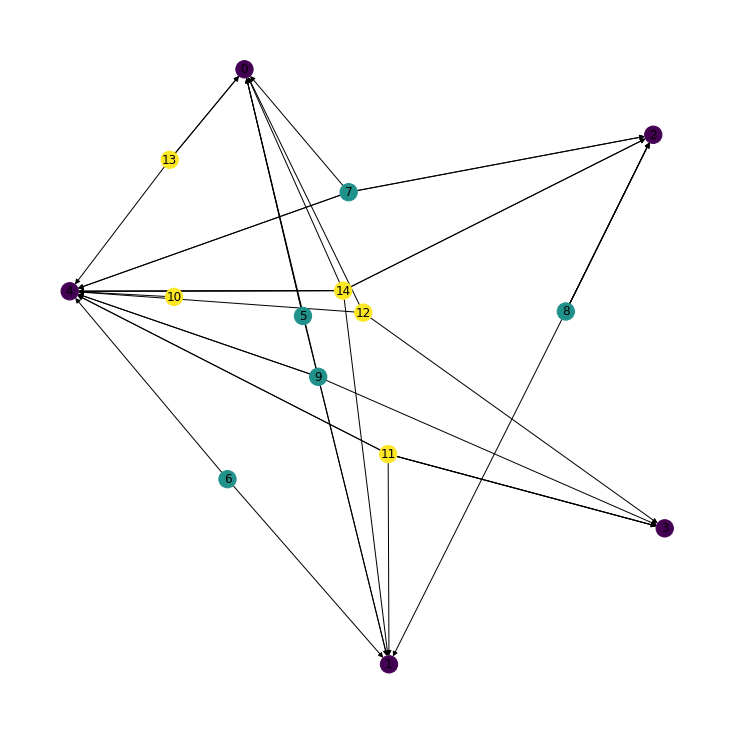

In [4]:
def get_subgraph_from_homograph(g, seed_node_1, seed_node_2, k_hops, print_time):
    
    """
    This function will create a subgraph around an edge pair, given the a homogeneous graph.
    
    ex: 
    node_range = 5
    number_edges = 20
    hg = dgl.heterograph({
        ('user', 'plays', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
        ('store', 'sells', 'game'): (torch.randint(0, node_range, (number_edges, 1)).reshape(-1), torch.randint(0, node_range, (number_edges, 1)).reshape(-1)),
    })
    
    g = dgl.to_homogeneous(hg)

    It will output:
    - All the nodes in the subgraph in the format: [node_type_ids]
    
    ex: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    
    - The distances of all the nodes to each seed_node in the format: tensor of shape (n_nodes,2)
    All nodes have distace -1, and if they are less than k_hops away, then their distances are 0 to k_hops.
    
    ex: tensor([[0., 2.],
                [2., 1.],
                [2., 2.],
                [2., 2.],
                [2., 1.],
                [2., 1.],
                [1., 2.],
                [2., 3.],
                [1., 1.],
                [2., 1.],
                [2., 0.],
                [1., 2.],
                [1., 2.],
                [1., 2.],
                [1., 2.]])
    
    Parameters
        ----------
        g : dgl.graph
        It assumes that all IDs are continuous from 0 to n_ID. If it is not the case, 
        distances will raise an error, because the node ID is used as index.
        
        seed_node_1 : [node_type_id]
            One of the node in the center pair
        seed_node_2 : [node_type_id]
            The other node in the center pair
        k_hops : int
            Number of hops around the center edge
        print_time: bool True/False
            Prints the time it took to create the subgraph
    """
    
    t1 = datetime.now()

    distances = -torch.ones(g.num_nodes(), 2)

    idx = 0
    
    nodes_subgraph_1, nodes_subgraph_2 = set(), set()

    for nodes_subgraph, seed_node in zip([nodes_subgraph_1, nodes_subgraph_2], [seed_node_1, seed_node_2]):
        
        nodes_subgraph.update([seed_node])
        subgraph_in, subgraph_out = g.in_edges(seed_node), g.out_edges(seed_node)

        distances[seed_node, idx] = 0

        for k_hop in range(k_hops):

            new_adj_nodes = set()

            for nodes_id_1, nodes_id_2 in [subgraph_in, subgraph_out]:

                nodes_id = set(nodes_id_1.numpy()).union(set(nodes_id_2.numpy()))
                new_adj_nodes.update(nodes_id.difference(nodes_subgraph))
                nodes_subgraph.update(new_adj_nodes)

            new_adj_nodes = list(new_adj_nodes)
            subgraph_in, subgraph_out = g.in_edges(new_adj_nodes), g.out_edges(new_adj_nodes)

            distances[new_adj_nodes, idx] = k_hop + 1

        idx += 1
    
    nodes_subgraph = list(nodes_subgraph_1.union(nodes_subgraph_2))
    
    t2 = datetime.now()    
    
    if print_time:
        print('time:', t2 - t1)

    return nodes_subgraph, distances

    
seed_node_1 = 0
seed_node_2 = hg.num_nodes('game')+hg.num_nodes('store')

k_hops = 3
print_time = True    

g = dgl.to_homogeneous(hg)

nodes_subgraph, distances = get_subgraph_from_homograph(g, seed_node_1, seed_node_2, k_hops, print_time)

g.ndata['center_dist'] = distances    

subgraph = g.subgraph(nodes_subgraph)
draw_graph(subgraph)

In [11]:
for ntype in hg.ntypes:
    print(ntype, hg.num_nodes(ntype))

game 19
store 20
user 20


In [12]:
hg2 = dgl.to_heterogeneous(g, ntypes = hg.ntypes, etypes = hg.etypes)

In [224]:
g.nodes[all_vs].data['_TYPE']

NodeSpace(data={'_TYPE': tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]), '_ID': tensor([0, 1, 0, 2, 3, 4, 5, 7, 8, 9, 1, 2, 3, 5, 7, 8, 9])})

In [225]:
from collections import defaultdict
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import networkx as nx
import dgl
import torch
import pandas as pd
import random

def merge_node_ids_and_edges(edges,
                             all_nodes,
                             merge_on_col,
                             cols_to_merge,
                             node_position):

    return pd.merge(edges,
                     all_nodes.rename(columns={col:col + f'_{node_position}' for col in merge_on_col + cols_to_merge}),
                     on=[col + f'_{node_position}' for col in merge_on_col],
                     how='left')            
                     
node_range = 5
number_edges = 20

node_df = pd.DataFrame(columns=['node_type', 'node_type_id', 'node_uid'])

node_type_list = []
node_type_ids_list = []
num_nodes_per_type = dict()
for node_type in ['user', 'game', 'store']:
    num_nodes = random.randint(1, node_range)
    num_nodes_per_type[node_type] = num_nodes
    node_type_list += [node_type]*num_nodes
    node_type_ids_list += list(range(num_nodes))
    
node_df['node_type'] = node_type_list
node_df['node_type_id'] = node_type_ids_list
node_df['node_uid'] = list(range(len(node_df)))

data_dict = {
    ('user', 'plays', 'game'): (torch.randint(0, num_nodes_per_type['user'], (number_edges, 1)).reshape(-1), torch.randint(0, num_nodes_per_type['game'], (number_edges, 1)).reshape(-1)),
    ('store', 'sells', 'game'): (torch.randint(0, num_nodes_per_type['store'], (number_edges, 1)).reshape(-1), torch.randint(0, num_nodes_per_type['game'], (number_edges, 1)).reshape(-1)),
    }

num_nodes_dict  = {'user': num_nodes_per_type['user'],
                   'game': num_nodes_per_type['game'],
                   'store': num_nodes_per_type['store']}

hg = dgl.heterograph(data_dict = data_dict,
                     num_nodes_dict = num_nodes_dict)

g = dgl.to_homogeneous(hg)

In [226]:
subgraph.canonical_etypes

[('store', 'sells', 'game'), ('user', 'plays', 'game')]

In [227]:
data_dict

{('user',
  'plays',
  'game'): (tensor([3, 1, 0, 0, 3, 3, 1, 3, 3, 2, 3, 3, 2, 2, 3, 0, 1, 1, 0, 0]), tensor([0, 0, 2, 3, 0, 1, 3, 1, 2, 1, 0, 2, 3, 3, 1, 3, 3, 0, 1, 0])),
 ('store',
  'sells',
  'game'): (tensor([2, 4, 2, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 4, 3, 4, 1, 4, 1, 4]), tensor([1, 1, 1, 1, 3, 0, 3, 0, 2, 1, 2, 0, 3, 3, 3, 0, 3, 0, 0, 2]))}

In [228]:
map_node_type_id_to_str = {i: node_type for i, node_type in enumerate(hg.ntypes)}
map_node_type_id_to_str

{0: 'game', 1: 'store', 2: 'user'}

In [229]:
g.ndata

{'_TYPE': tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]), '_ID': tensor([0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3])}

In [231]:
data = torch.cat([g.ndata['_TYPE'].reshape(-1,1),
                  g.nodes().reshape(-1,1),
                  g.ndata['_ID'].reshape(-1,1)],
                  axis=-1).numpy()

df_homogeneous = pd.DataFrame(data, columns=['node_type', 'homo_node_uid', 'node_type_id'])
df_homogeneous['node_type'] = df_homogeneous['node_type'].transform(lambda x: map_node_type_id_to_str[x])

df = merge_node_ids_and_edges(df,
                              df_homogeneous,
                              merge_on_col = ['node_type', 'node_uid'],
                              cols_to_merge = ['homo_node_uid'],
                              node_position = 1)

In [232]:
node_df

,node_type,type_id,unique_id
0,user,0,0
1,user,1,1
2,user,2,2
3,user,3,3
4,game,0,4
5,game,1,5
6,game,2,6
7,game,3,7
8,store,0,8
9,store,1,9


In [233]:
df_homogeneous

,node_type,homo_unique_id,type_id
0,game,0,0
1,game,1,1
2,game,2,2
3,game,3,3
4,store,4,0
5,store,5,1
6,store,6,2
7,store,7,3
8,store,8,4
9,user,9,0


In [150]:
g.nodes()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [146]:
df

,node_type,type_id,unique_id
0,user,0,0
1,user,1,1
2,game,0,2
3,game,1,3
4,game,2,4
5,game,3,5
6,store,0,6
7,store,1,7
8,store,2,8


time: 0:00:00.030005


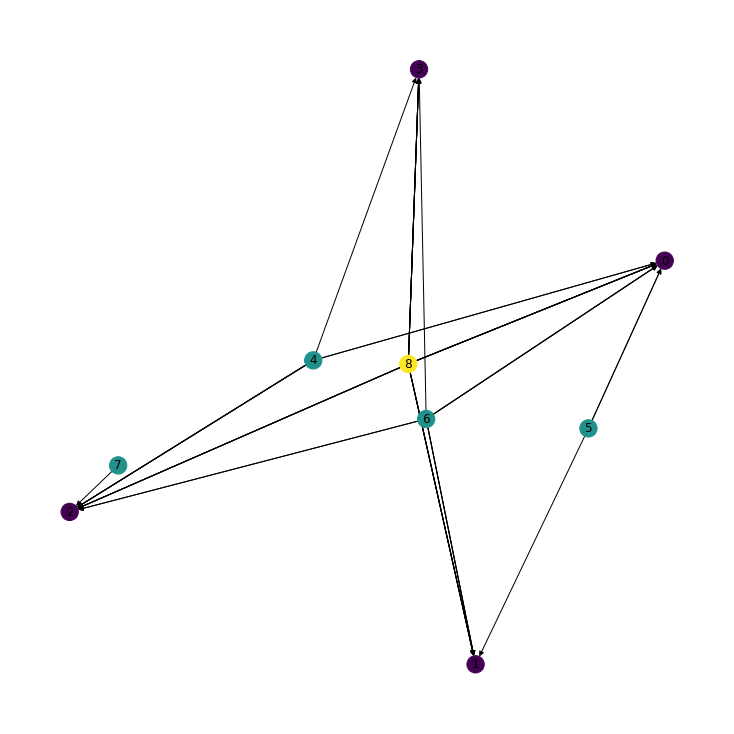

In [143]:
seed_node_1 = {'game':[0]}
seed_node_2 = {'user':[0]}

print_time = True    
k_hops = 3
fanout = -1

nodes_subgraph, hetero_distances = get_subgraph_from_heterograph(hg, seed_node_1, seed_node_2, k_hops, fanout, print_time)

for node_type in hg.ntypes:
    hg.nodes[node_type].data['center_dist'] = hetero_distances[node_type]

subgraph = hg.subgraph(nodes_subgraph)
homo_g = dgl.to_homogeneous(subgraph)
draw_graph(homo_g)

In [123]:
df[df['node_type']=='user'].max()

node_type       user
node_type_id       3
node_id            3
dtype: object